# Pymaceuticals Inc.
---

### Analysis
* There is a positive correlation between the Mouse Weight and the Tumor Volume (mm3), with a correlation coefficient of 0.83 (heavier the mouse, less effective the drug).
* Capomulin seems to be the most effective drug regimen among the others, based on final tumor volumes displayed in the box plot (Capomulin and Ramicane produce far better result than other drug regimens).
* There is a negative correlation between the Mouse L509 timepoint and the Tumor Volume (mm3), with a correlation coefficient of -0.74 (Capomulin drug works quite effectively as timepoint progresses).

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [84]:
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [85]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
total_duplicate_mice = merge_df.loc[merge_df["Mouse ID"]=="g989",:]
total_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                         "Median Tumor Volume":median,
                         "Tumor Volume Variance":var,
                         "Tumor Volume Std. Dev.":std,
                         "Tumor Volumes Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumes Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [92]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = clean_df["Drug Regimen"].value_counts()
unique_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

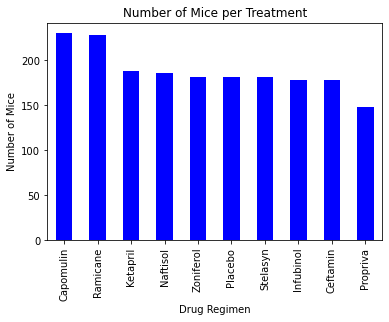

In [93]:
plot_pandas = unique_mice.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

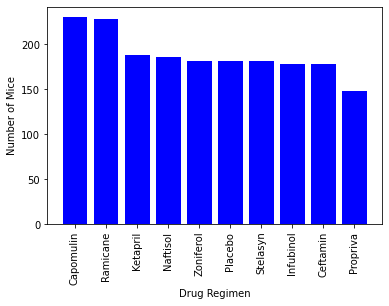

In [94]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x_axis = unique_mice.index.values
y_axis = unique_mice.values

plt.bar(x_axis, y_axis, color="b", alpha=1, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

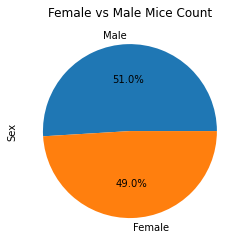

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Female vs Male Mice Count")
plt.show()

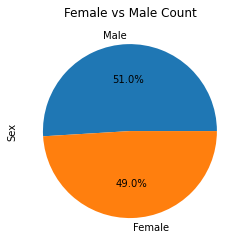

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.042553, 50.957447]
clean_df["Sex"].value_counts().plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs Male Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_df=pd.merge(last_timepoint_df, clean_df, on=("Mouse ID", "Timepoint"), how="left")
last_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    drug_df = last_df.loc[last_df["Drug Regimen"]==drug]
    final_df = drug_df.loc[drug_df["Timepoint"]==drug_df["Timepoint"]]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_df["Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_vol)
                           
    # IQR / Bounds / Outliers
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(final_df["Tumor Volume (mm3)"]>=upper_bound)|(final_df["Tumor Volume (mm3)"]<=lower_bound)].count()
    
    #Print Results
    print(f"{drug}'s IQR is : {iqr}")
    print(f"Lower Bound : {lower_bound}")
    print(f"Upper Bound : {upper_bound}")
    print(f"Number of outliers: {outliers}")

Capomulin's IQR is : 7.781863460000004
Lower Bound : 20.70456164999999
Upper Bound : 51.83201549
Number of outliers: 0
Ramicane's IQR is : 9.098536719999998
Lower Bound : 17.912664470000003
Upper Bound : 54.30681135
Number of outliers: 0
Infubinol's IQR is : 11.477135160000003
Lower Bound : 36.83290494999999
Upper Bound : 82.74144559000001
Number of outliers: 1
Ceftamin's IQR is : 15.577752179999997
Lower Bound : 25.355449580000002
Upper Bound : 87.66645829999999
Number of outliers: 0


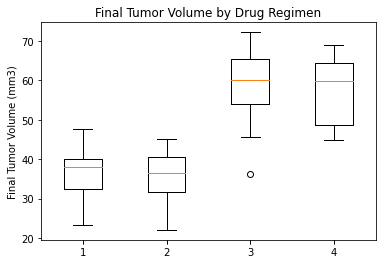

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_marker = dict(marker='o', markerfacecolor='r')

plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) #can't figure out why x-axis is not labeled accordingly to the Regimen names
plt.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

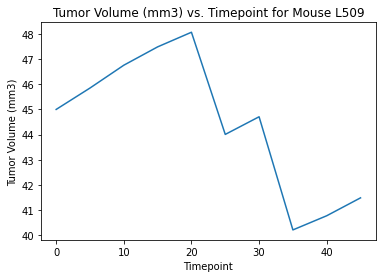

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse_l509 = clean_df.loc[clean_df["Mouse ID"]=="l509"]

plt.plot(capomulin_mouse_l509["Timepoint"], capomulin_mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Timepoint for Mouse L509")
plt.show()
#corr = st.pearsonr(capomulin_mouse_l509["Timepoint"], capomulin_mouse_l509["Tumor Volume (mm3)"])
#corr

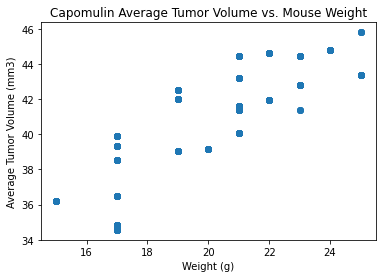

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_tumor_df = pd.merge(capomulin_df, avg_tumor, on="Mouse ID", how="left")
avg_tumor_df

x_axis = avg_tumor_df["Weight (g)"]
y_axis = avg_tumor_df["Tumor Volume (mm3)_y"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

 The Correlation Coefficient between mouse weight and avaerage tumor volume is 0.83


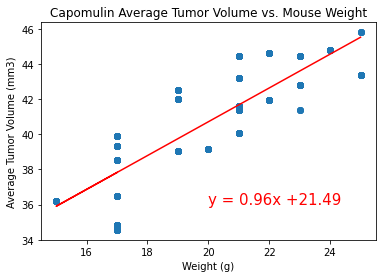

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
rgress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_axis, rgress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.scatter(x_axis, y_axis)
print(f" The Correlation Coefficient between mouse weight and avaerage tumor volume is {round(corr[0],2)}")